# **Lab 8 XGBOOST**

# **This lab is 3% of total Lab weight**

# Outline:
Powerful supervised machine learning algorithms.


1.   Recap of supervised learning.
2.   Discuss gradient boosting at a high level - Explain the need for boosting
3.   Introduce the idea of gradient boosting.
4.   Introduce XGBoost package - why is xgboost needed? Parallelization? Different APIs? How is it different from regular gradient boosting?
5.   Explain with a picture how XGBoost is used under the umbrella of ensemble methods. Provide a diagram to explain it.

6. Show an example of training xgboost on a dataset? California Housing maybe -> Regression problem.

7. Introduce the scikit-learn API for XGBoost
    1. Train an XGBoost classifier model maybe on MNIST?
    2. Obtain the accuracy.

Activity:

Go to the xgboost documentation and play around with the hyperparameters to improve model performance.

Compare with logistic regression, can you improve on the accuracy by fiddling with the hyperparameters?

Implement cross-validation with XGBoost





# XGBoost Tutorial

XGBoost stands for eXtreme Gradient Boosting.
In order to understand what XGBoost, we need to understand what gradient boosting is.

## What is Boosting or Gradient Boosting?
The idea of boosting stems from the fact that 'weak learners' can be combined to form a strong model. Basically, we try to sequentially (or parallelly) add models for which we have weak predictions and optimize to improve on the weak predictions. **Gradient boosting**is simply the idea of optimizing the set of weak learners using a gradient descent-like procedure. The set of algorithms that use the gradient boosting technique are referred to as gradient boosting machines. Generally, boosting algorithms use trees as models, which are added sequentially.

## Why do we need boosting?
When solving a machine learning problem, it's possible that the chosen model does not perform well for some samples. One may refer to such a model as a weak learner because one does not have the best possible model. There are multiple ways to solve this problem, use a different model, change the optimization procedure, etc. A clever approach is to focus on improving the performance of the examples for which the model didn't perform well. This is the core idea of boosting.

## Gradient Boosting - An explanation.
Gradient Boosting is used as a sequential/additive model training process where many weak models/learners are trained in sequence. In other words, they are trained iteratively. After many iterations or aggregation of the weak learners, we obtain the final ensemble model.
Given below is a visual explanation of how gradient boosting works.

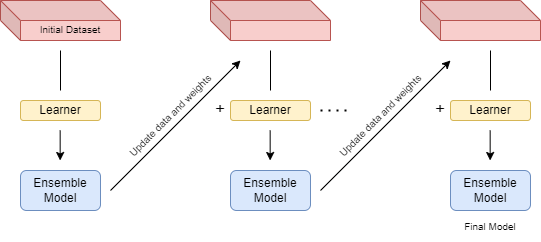



The model training starts with a simple model, and using its predictions and the ground truth, and we get an error. The errors from the first model then become the labels for the next model to be trained on. This process continues resulting in an ensemble model. We can repeat this procedure as many times as needed till we are satisfied with the ensemble model. This is also known as **additive training**. And each successive model is generally a tree-based model like a decision tree.


As a [mathematical formulation](https://xgboost.readthedocs.io/en/stable/tutorials/model.html#additive-training), this is what it looks like:


$\hat{y}_i^{(0)} = 0$

$\hat{y}_i^{(1)} = f_1(x_i) = \hat{y}_i^{(0)} + f_1(x_i)$

$\hat{y}_i^{(2)} = f_1(x_i) + f_2(x_i) = \hat{y}_i^{(1)} + f_2(x_i)$

.
.
.

$\hat{y}_i^{(t)} = \sum_{k=1}^t f_k(x_i) = \hat{y}_i^{(t-1)} + f_t(x_i)$



We need an objective/cost function to train a machine learning model.

$ojb^t = ∑_{i=1}^n l(y_i , \hat(y)^{(t)} + ∑_{i=1}^t ω(f_i)$

So, the only thing you need to change is your loss function to train a different model.
Fortunately, we don't have to implement the loss function by ourselves as we have a wonderful package to take care of it.

## Introduction to XGBoost

Now that we have some ground work laid out, we are ready to talk about XGBoost.
XGBoost is one of the many supervised learning algorithms that has gained a lot of traction in recent times owing to its superior performance in many machine learning competitions.

As said before, XGBoost stands for eXtreme Gradient Boosting. The name may be misleading as one might think of it to be as a new algorithm on top of gradient boosting. But simply, it's a more optimized version of the set of gradient boosting algorithms with the power of parallel computing. One important feature of XGBoost is that it supports regularization of gradient boosting algorithms thus preventing overfitting (which gradient boosting algorithms are susceptible to). XGBoost also supports parallelization of training on multiple CPUs simultaneously.
NOTE: XGBoost does not train the tree models independently on different cpus as gradient boosting in itself is a sequential procedure. But XGBoost paralellizes the creation of branches of the individual trees, which makes it faster.

## The XGBoost package
The XGBoost package is a versatile package providing support for multiple programming languages such as Python, R, Julia, Scala, C, C++, Ruby, Swift, and Java. We will be using the package for Python. XGBoost is also compatible with existing scientific computing python packages such as numpy and scipy. It also has support for pandas' dataframes. More information can be found [here](https://xgboost.readthedocs.io/en/stable/python/python_intro.html).

XGBoost also provides multiple APIs for different use cases. For example, we will be using the scikit-learn XGBoost API. This means that we will be able to use the familiar functions `.fit` and `.predict` on our XGBoost models. To learn more about the scikit-learn XGBoost API, visit [this](https://xgboost.readthedocs.io/en/stable/python/python_api.html#module-xgboost.sklearn) link.



## Linear Regression with XGBoost

In [1]:
# Import XGBoost package.
import xgboost as xgb
from xgboost import XGBRegressor

# Let's also import the standard data science packages.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Scikit-learn packages.
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.datasets import fetch_california_housing

from sklearn.linear_model import LogisticRegression

We'll train a regression model on the California housing dataset to predict house prices.

In [2]:
housing = fetch_california_housing()

Let's see the description of the dataset.

In [3]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

Let's print the dataset and see what's in it.

In [4]:
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [5]:
# These are the feature names.
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


Let's obtain the features and target values.

In [6]:
X = housing.data
y = housing.target

# These are numpy arrays so we can print out the shape of each variable.
print("Shape of input features: ", X.shape)
print("Shape of target variable: ", y.shape)

Shape of input features:  (20640, 8)
Shape of target variable:  (20640,)


So we have 20640 samples in total.

Divide the dataset into training and test set.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)  # Use 20% of the dataset as test set.

XGBoost supports both Regression and Classification models. Since our target variable is continuous, we will use a regression model.

NOTE: The power of XGBoost comes from parallelizing computations.
By default, the number of parallel threads to run the code is set of 1. But we can change that by setting the `n_jobs` to the respective number of threads. A good thumb rule is to set the number of threads to number of cpu cores that are on the machine running the code.

NOTE: Google Colab provides 2 CPUs in the default plan. Generally, the speedup is noticeable when XGBoost is trained on massive datasets with a lot of features, but for the California housing dataset, it may not be noticeable.

In [8]:
# Now let's train an XGBoost regression model.
model = XGBRegressor(random_state=42, n_jobs=2)  # Initialize the XGBoost regression model. Fixing the random_state for reproducibility.
model.fit(X_train, y_train)  # Fit the model.
preds = model.predict(X_test)

Yes! It's that simple!
Now let's evaluate the predictions. We can use mean squared error for it.

In [9]:
print("Mean squared error is: ", mean_squared_error(y_test, preds))

Mean squared error is:  0.21611504491209652


We can also calculate the $R^2$ value which gives us a measure of the proportion of the variation in the dependent variable that is predictable from the independent features.

In [10]:
from sklearn.metrics import r2_score
r2_score(y_test, preds)

0.8417107619447489

That's a high $R^2$ score, which means we have a good model.

#Train XGBoost Classifier Model.

Train a XGBoost Classifier to predict handwritten digits. You may use the MNIST dataset for this challenge. What performance do you get when using the default parameters? Refer to [this](https://xgboost.readthedocs.io/en/stable/python/python_api.html#xgboost.XGBClassifier) link on how to use XGBoost Classifier.

#Activity 1- Load the MNIST dataset from scikit-learn.

Remember to import the scikit-learn datasets package.

In [11]:
### START YOUR CODE HERE.

# Import the datasets package from scikit-learn
from sklearn.datasets import load_digits

# Load the MNIST dataset
digits = load_digits()

### END OF YOUR CODE HERE

#Activity 2- Now get the features and the target variables.

Remember to reshape the feature into a 2-d matrix. Refer to [this](https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html) link for instructions on how to correctly load the mnist dataset.

In [12]:
### START YOUR CODE HERE.
# Load the features and target variables.
X = digits.data      # Already a 2D array: (n_samples, n_features)
y = digits.target    # Labels for each image

### END OF YOUR CODE HERE

#Activity 3- Now obtain the train and test sets from the features $X$, and the target $y$.




In [13]:
### START YOUR CODE HERE.
# Train test split.
# Split into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### END OF YOUR CODE HERE

#Activity 4- Then initialize an XGBoost Classifier and train the model.

In [14]:
### START YOUR CODE HERE.

from xgboost import XGBClassifier

# Initialize the XGBoost Classifier
model = XGBClassifier(eval_metric="mlogloss", random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Predict on the test set
preds = model.predict(X_test)

### END OF YOUR CODE HERE

print("XGBoost Classifier accuracy with default hyperparameters is: ",accuracy_score(y_test, preds))

XGBoost Classifier accuracy with default hyperparameters is:  0.9694444444444444


#Implement K-fold cross-validation

#Activity 5- Implement [k-fold cross-validation]
(https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) with XGBoost.  For each fold, get a different train and test set. Print the average accuracy over the different cross-validation folds. You may start with `k=5` and modify it as you wish.

In [15]:
### START YOUR CODE HERE - PART A

# define parameters here

# Do 5-fold cross-validation.
# Set number of folds
splits = 5

# define a k spliter based on k-fold object of sckikit learn
# Create a KFold cross-validator with 5 splits and shuffling enabled
kf = KFold(n_splits=splits, shuffle=True, random_state=42)

# List to store accuracy for each fold
fold_accuracies = []

### END OF YOUR CODE HERE - PART A

for train_idx, test_idx in kf.split(X):
### START YOUR CODE HERE - PART B

    # Split the data
    X_train_fold, X_test_fold = X[train_idx], X[test_idx]
    y_train_fold, y_test_fold = y[train_idx], y[test_idx]

    # Initialize and train model
    model = XGBClassifier(eval_metric='mlogloss', random_state=42)
    model.fit(X_train_fold, y_train_fold)

    # Predict and evaluate
    preds_fold = model.predict(X_test_fold)
    accuracy = accuracy_score(y_test_fold, preds_fold)

    # Append accuracy to the list
    fold_accuracies.append(accuracy)

### END OF YOUR CODE HERE - PART B

print(f"All accuracies are: {fold_accuracies}")
print(f"Mean XGBoost classifier over k={splits} folds is : {np.mean(fold_accuracies)}")

All accuracies are: [0.9694444444444444, 0.9722222222222222, 0.9442896935933147, 0.9777158774373259, 0.958217270194986]
Mean XGBoost classifier over k=5 folds is : 0.9643779015784586


#Compare performance with Logistic Regression.
Compare the performance of XGBoost with Logistic Regression for classifying MNIST digits. You can reuse the code from the previous cell that uses cross-validation and then compare the performance over 5 folds.

NOTE: Your implementation may take a while to finish. To avoid the converge warning, set the `max_iter` hyperparameter of the LogisticRegression model to 100000.

#Activity 6- Implement Logistic Regression

In [16]:
### START YOUR CODE HERE

# Implement LogisticRegression.

# Reuse k-fold splitter
fold_accuracies = []

for train_idx, test_idx in kf.split(X):
    # Split data
    X_train_fold, X_test_fold = X[train_idx], X[test_idx]
    y_train_fold, y_test_fold = y[train_idx], y[test_idx]

    # Initialize and train Logistic Regression model
    log_reg = LogisticRegression(max_iter=100000)
    log_reg.fit(X_train_fold, y_train_fold)

    # Predict and evaluate
    preds_fold = log_reg.predict(X_test_fold)
    accuracy = accuracy_score(y_test_fold, preds_fold)

    # Store the fold accuracy
    fold_accuracies.append(accuracy)

### END OF YOUR CODE HERE

print(f"All accuracies are: {fold_accuracies}")
print(f"Mean LogReg classifier over k={splits} folds is : {np.mean(fold_accuracies)}")

All accuracies are: [0.975, 0.9611111111111111, 0.9610027855153204, 0.9610027855153204, 0.958217270194986]
Mean LogReg classifier over k=5 folds is : 0.9632667904673475


And that's how XGBoost works! You now understand the core fundamentals of the XGBoost framework and motivation behind it, and how to implement the algorithm to solve machine learning problems.

While both models performed well, based on the 5-fold cross-validation results, XGBoost achieved a slightly higher average accuracy compared to Logistic Regression. Therefore, XGBoost is slightly the better-performing model for classifying handwritten digits in this task.